<img src="mmu.png" style="height: 80px;" align=left> 

# Project [30%]

# Project Members:
(1) 1181103230 Loo Chen Zhi 01116789079

(2) 1181103362 Chang See Jie 0143490382

(3) 1181103501 Lim Wei Jie 0125681547

# Load Libraries

In [1]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\User\OneDrive\Desktop\Degree 3.2\Data Mining\Project\dm_project_venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from apyori import apriori
from boruta import BorutaPy
from imblearn.over_sampling import SMOTE
from geopy.geocoders import Nominatim

from sklearn import metrics
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans 
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", 500)

# Data Preprocessing

## Load Dataset

In [3]:
# import the dataset and load it into a pandas DataFrame
df = pd.read_csv('dataset.csv')

In [4]:
# get the first 5 records
df.head(5)

,Date,Time,Race,Gender,Body_Size,Age_Range,With_Kids,Kids_Category,Basket_Size,Basket_colour,Attire,Shirt_Colour,shirt_type,Pants_Colour,pants_type,Wash_Item,Washer_No,Dryer_No,Spectacles,TimeSpent_minutes,buyDrinks,TotalSpent_RM,latitude,longitude,Num_of_Baskets
0,19/10/2015,20:17:50,malay,male,moderate,28.0,yes,young,big,red,casual,blue,short_sleeve,black,short,clothes,3,10,no,20.0,2.0,9.0,2.912316,101.657948,1.0
1,19/10/2015,20:28:42,NaN,male,thin,32.0,no,no_kids,big,NaN,casual,white,short_sleeve,blue_jeans,long,NaN,6,9,no,19.0,4.0,21.0,2.922506,101.643129,3.0
2,19/10/2015,20:58:31,malay,female,moderate,30.0,no,no_kids,big,blue,casual,red,short_sleeve,black,long,NaN,4,10,no,18.0,2.0,13.0,2.935533,101.737170,1.0
3,19/10/2015,21:31:28,indian,male,thin,51.0,no,no_kids,NaN,black,casual,black,short_sleeve,yellow,short,clothes,5,9,no,13.0,2.0,16.0,2.949924,101.637069,1.0
4,19/10/2015,21:40:28,indian,male,NaN,34.0,no,no_kids,big,blue,casual,blue,NaN,white,long,clothes,3,9,NaN,15.0,1.0,13.0,2.903530,101.661249,3.0


In [5]:
# get the last 5 records
df.tail(5)

,Date,Time,Race,Gender,Body_Size,Age_Range,With_Kids,Kids_Category,Basket_Size,Basket_colour,Attire,Shirt_Colour,shirt_type,Pants_Colour,pants_type,Wash_Item,Washer_No,Dryer_No,Spectacles,TimeSpent_minutes,buyDrinks,TotalSpent_RM,latitude,longitude,Num_of_Baskets
3995,24/01/2016,21:45:06,foreigner,male,moderate,30.0,yes,no_kids,small,yellow,traditional,purple,short_sleeve,white,long,blankets,6,7,yes,15.0,3.0,9.0,3.082212,101.644878,2.0
3996,26/12/2015,1:48:15,malay,male,moderate,24.0,yes,baby,small,green,formal,black,long sleeve,black,short,clothes,4,10,yes,53.0,3.0,13.0,3.118138,101.677315,3.0
3997,07/12/2015,1:42:32,foreigner,male,thin,27.0,yes,no_kids,small,blue,casual,white,long sleeve,green,short,clothes,4,9,no,56.0,2.0,7.0,3.101051,101.643060,1.0
3998,10/02/2016,0:24:23,indian,female,thin,18.0,yes,baby,big,black,traditional,blue,short_sleeve,blue,long,blankets,6,10,no,26.0,2.0,7.0,3.136530,101.699091,1.0
3999,02/02/2016,9:47:17,chinese,female,fat,23.0,yes,young,big,grey,casual,black,long sleeve,white,long,blankets,4,10,yes,14.0,5.0,10.0,3.126260,101.701245,1.0


In [6]:
# get a concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               4000 non-null   object 
 1   Time               4000 non-null   object 
 2   Race               3802 non-null   object 
 3   Gender             3823 non-null   object 
 4   Body_Size          3817 non-null   object 
 5   Age_Range          3857 non-null   float64
 6   With_Kids          3814 non-null   object 
 7   Kids_Category      3970 non-null   object 
 8   Basket_Size        3795 non-null   object 
 9   Basket_colour      3797 non-null   object 
 10  Attire             3783 non-null   object 
 11  Shirt_Colour       3826 non-null   object 
 12  shirt_type         3815 non-null   object 
 13  Pants_Colour       3826 non-null   object 
 14  pants_type         3991 non-null   object 
 15  Wash_Item          3819 non-null   object 
 16  Washer_No          4000 

From the information provided above, we know that this dataset is made up of **25 features (columns)** and **4000 records (rows)**.

In the following section, we will perform data cleaning for inconsistent data entry.

## Cleaning Data

First of all, we will check for data inconsistency.

Let's check the string format in _Date_ and _Time_ columns.

In [7]:
# check if the record match the format
df[df['Date'].astype(str).str.match(r'[0-9][0-9]\/[0-9][0-9]\/[0-9][0-9][0-9][0-9]') == False]

,Date,Time,Race,Gender,Body_Size,Age_Range,With_Kids,Kids_Category,Basket_Size,Basket_colour,Attire,Shirt_Colour,shirt_type,Pants_Colour,pants_type,Wash_Item,Washer_No,Dryer_No,Spectacles,TimeSpent_minutes,buyDrinks,TotalSpent_RM,latitude,longitude,Num_of_Baskets


In [8]:
# check if the record match the format
df[df['Time'].astype(str).str.contains(r'[0-9]:[0-9][0-9]:[0-9][0-9]') == False]

,Date,Time,Race,Gender,Body_Size,Age_Range,With_Kids,Kids_Category,Basket_Size,Basket_colour,Attire,Shirt_Colour,shirt_type,Pants_Colour,pants_type,Wash_Item,Washer_No,Dryer_No,Spectacles,TimeSpent_minutes,buyDrinks,TotalSpent_RM,latitude,longitude,Num_of_Baskets
325,05/11/2015,15:47;02,malay,male,moderate,55.0,no,no_kids,big,brown,casual,red,short_sleeve,NaN,short,clothes,6,7,yes,60.0,4.0,13.0,2.957976,101.743522,1.0
326,05/11/2015,15:52;08,malay,female,thin,37.0,NaN,no_kids,big,white,casual,black,NaN,blue,long,clothes,5,10,no,16.0,3.0,16.0,2.969065,101.715743,1.0


In [9]:
# replace the incorrect record with the correct one
df['Time'] = df['Time'].replace({'15:47;02' : '15:47:02',
                                '15:52;08' : '15:52:08'})

In [10]:
# reformat date
df['Date'] =  pd.to_datetime(df['Date'], format='%d/%m/%Y').dt.date

Next, we want to know the value count for each column to check data consistency.

In [11]:
# checks values in every columns
for col in df.columns:
    print (f"\n---- {col} ----")
    print (df[col].value_counts())


---- Date ----
2015-11-29    134
2015-11-28    120
2015-11-27     80
2015-10-20     60
2015-10-24     55
             ... 
2015-10-25      6
2015-10-26      5
2015-11-05      4
2015-11-01      4
2015-10-30      1
Name: Date, Length: 115, dtype: int64

---- Time ----
4:03:48     12
4:06:19     11
4:07:46     11
4:04:37     10
4:06:22      9
            ..
23:51:41     1
11:39:36     1
23:03:53     1
19:27:03     1
9:47:17      1
Name: Time, Length: 3639, dtype: int64

---- Race ----
malay         1024
indian         981
chinese        966
foreigner      831
Name: Race, dtype: int64

---- Gender ----
female    1931
male      1892
Name: Gender, dtype: int64

---- Body_Size ----
moderate    1304
fat         1267
thin        1246
Name: Body_Size, dtype: int64

---- Age_Range ----
53.0    113
42.0    111
47.0    109
46.0    107
45.0    105
54.0    105
32.0    103
34.0    102
55.0    102
44.0    101
30.0    101
40.0     99
36.0     99
50.0     99
29.0     97
49.0     96
48.0     95
37.0     

Next, we want to know the unique values in every _object_ datatype columns except _Date_ and _Time_.

In [12]:
# extract column names of object columns
df_obj_col = list(df.select_dtypes(['object']).columns)
df_obj_col[2:]    # exclude Date and Time columns

pd.unique(df[df_obj_col[2:]].values.ravel('K'))

array(['malay', nan, 'indian', 'chinese', 'foreigner ', 'male', 'female',
       'moderate', 'thin', 'fat', 'yes', 'no', 'young', 'no_kids',
       'toddler ', 'toddler', 'baby', 'big', 'small', 'red', 'blue',
       'black', 'pink', 'purple', 'yellow', 'brown', 'white', 'orange',
       'green', 'grey', 'casual', 'traditional', 'formal', 'black ',
       'short_sleeve', 'long sleeve', 'blue_jeans', 'blue  ', 'blue ',
       'short', 'long', 'clothes', 'blankets'], dtype=object)

We found that there are some values having trailing whitespaces. We want to remove them from the dataframe.

In [13]:
df[df_obj_col[2:]] = df[df_obj_col[2:]].apply(lambda x: x.str.strip())

## Dealing with Missing Values

In this section, we will deal with all the missing values in the dataset. The missing values in different columns will be handled in different ways.

First of all, we want to know which columns are having missing values.

In [14]:
# check for missing values
df.isna().sum()

Date                   0
Time                   0
Race                 198
Gender               177
Body_Size            183
Age_Range            143
With_Kids            186
Kids_Category         30
Basket_Size          205
Basket_colour        203
Attire               217
Shirt_Colour         174
shirt_type           185
Pants_Colour         174
pants_type             9
Wash_Item            181
Washer_No              0
Dryer_No               0
Spectacles           209
TimeSpent_minutes     69
buyDrinks             35
TotalSpent_RM         54
latitude               0
longitude              0
Num_of_Baskets       182
dtype: int64

**We will handle the missing values in this dataset by:**
1. impute the value 'unknown' for _object_ datatype columns
2. replace with median value for _Age_Range_ and _TimeSpent_minutes_ columns
3. replace with mode value for _Num_of_Baskets_ columns
4. replace with 0 for _buyDrinks_ column
5. delete all rows containing missing values in _TotalSpent_RM_ column

In [15]:
# impute the missing values in object columns with 'unknown' and treat them as a separate category
df[df_obj_col] = df[df_obj_col].fillna('unknown')

# replace the missing values with median
df['Age_Range'] = df['Age_Range'].fillna(df['Age_Range'].median())
df['TimeSpent_minutes'] = df['TimeSpent_minutes'].fillna(df['TimeSpent_minutes'].median())

# replace the missing values with mode
df['Num_of_Baskets'] = df['Num_of_Baskets'].fillna(df['Num_of_Baskets'].mode()[0])

# replace the missing values with 0
df['buyDrinks'] = df['buyDrinks'].fillna(0)

# drop all NA for the TotalSpent_RM column
df.dropna(subset=['TotalSpent_RM'], inplace=True)

In [16]:
# check again for missing values
df.isna().sum()

Date                 0
Time                 0
Race                 0
Gender               0
Body_Size            0
Age_Range            0
With_Kids            0
Kids_Category        0
Basket_Size          0
Basket_colour        0
Attire               0
Shirt_Colour         0
shirt_type           0
Pants_Colour         0
pants_type           0
Wash_Item            0
Washer_No            0
Dryer_No             0
Spectacles           0
TimeSpent_minutes    0
buyDrinks            0
TotalSpent_RM        0
latitude             0
longitude            0
Num_of_Baskets       0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3946 entries, 0 to 3999
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               3946 non-null   object 
 1   Time               3946 non-null   object 
 2   Race               3946 non-null   object 
 3   Gender             3946 non-null   object 
 4   Body_Size          3946 non-null   object 
 5   Age_Range          3946 non-null   float64
 6   With_Kids          3946 non-null   object 
 7   Kids_Category      3946 non-null   object 
 8   Basket_Size        3946 non-null   object 
 9   Basket_colour      3946 non-null   object 
 10  Attire             3946 non-null   object 
 11  Shirt_Colour       3946 non-null   object 
 12  shirt_type         3946 non-null   object 
 13  Pants_Colour       3946 non-null   object 
 14  pants_type         3946 non-null   object 
 15  Wash_Item          3946 non-null   object 
 16  Washer_No          3946 

Now, we have done dealing with the missing values. After cleaning, our dataset remains **25 columns** and **3946 rows**. The table below shows the first 10 records of the dataset after dealing with all the missing values.

In [18]:
# sort the dataframe based on Date and followed by Time
df.sort_values(by=['Date', 'Time'], ignore_index=True, inplace=True)
df.head(10)

,Date,Time,Race,Gender,Body_Size,Age_Range,With_Kids,Kids_Category,Basket_Size,Basket_colour,Attire,Shirt_Colour,shirt_type,Pants_Colour,pants_type,Wash_Item,Washer_No,Dryer_No,Spectacles,TimeSpent_minutes,buyDrinks,TotalSpent_RM,latitude,longitude,Num_of_Baskets
0,2015-10-19,20:17:50,malay,male,moderate,28.0,yes,young,big,red,casual,blue,short_sleeve,black,short,clothes,3,10,no,20.0,2.0,9.0,2.912316,101.657948,1.0
1,2015-10-19,20:28:42,unknown,male,thin,32.0,no,no_kids,big,unknown,casual,white,short_sleeve,blue_jeans,long,unknown,6,9,no,19.0,4.0,21.0,2.922506,101.643129,3.0
2,2015-10-19,20:58:31,malay,female,moderate,30.0,no,no_kids,big,blue,casual,red,short_sleeve,black,long,unknown,4,10,no,18.0,2.0,13.0,2.935533,101.737170,1.0
3,2015-10-19,21:31:28,indian,male,thin,51.0,no,no_kids,unknown,black,casual,black,short_sleeve,yellow,short,clothes,5,9,no,13.0,2.0,16.0,2.949924,101.637069,1.0
4,2015-10-19,21:40:28,indian,male,unknown,34.0,no,no_kids,big,blue,casual,blue,unknown,white,long,clothes,3,9,unknown,15.0,1.0,13.0,2.903530,101.661249,3.0
5,2015-10-19,23:45:38,unknown,male,fat,50.0,no,no_kids,unknown,unknown,casual,brown,unknown,blue_jeans,long,clothes,4,8,no,35.0,5.0,16.0,2.928514,101.720640,3.0
6,2015-10-19,23:53:38,unknown,female,fat,45.0,no,no_kids,big,pink,traditional,blue,unknown,black,long,clothes,5,10,no,30.0,3.0,17.0,2.970783,101.674459,2.0
7,2015-10-20,0:04:56,malay,female,moderate,45.0,no,no_kids,big,pink,formal,red,long sleeve,black,long,blankets,3,7,no,26.0,2.0,16.0,2.919387,101.670407,2.0
8,2015-10-20,0:24:01,indian,male,thin,49.0,unknown,unknown,big,blue,casual,white,short_sleeve,brown,long,clothes,3,9,unknown,46.0,0.0,16.0,2.951176,101.746526,3.0
9,2015-10-20,0:45:19,indian,male,thin,30.0,no,no_kids,small,purple,casual,unknown,short_sleeve,black,short,unknown,6,10,no,60.0,4.0,17.0,2.955302,101.703961,2.0


## Data Transformation

In this section, we will create a new column _Drinks_ by transforming _buyDrinks_ column. It the records in _buyDrinks_ is larger than 1, then it will be indicated by 1 in the new created column _Drinks_.

In [19]:
df['buyDrinks'].value_counts()

0.0    673
3.0    669
5.0    658
2.0    654
4.0    652
1.0    640
Name: buyDrinks, dtype: int64

In [20]:
# create a function to perform this data transformation
def addDrinks (row):
    if row['buyDrinks'] > 0:
        return 1
    else:
        return 0

# apply the function to create new column
df['Drinks'] = df.apply(lambda row: addDrinks(row), axis=1)

In [21]:
# check new column values
df['Drinks'].value_counts()

1    3273
0     673
Name: Drinks, dtype: int64

From the result shown above, we noticed that there is a data imbalancing. We will plot a bar chart to have a better visualisation.

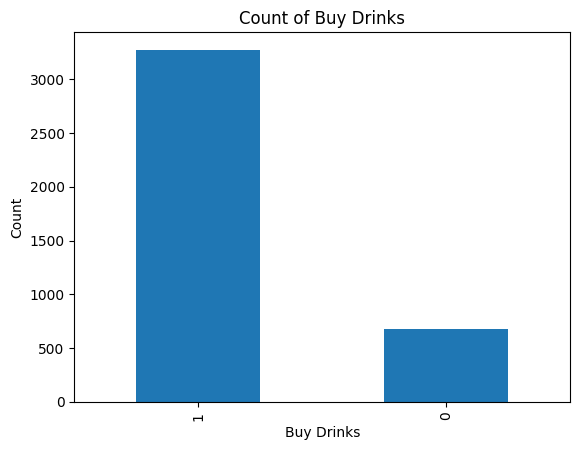

In [22]:
# plot a barchart to check imbalance data
df["Drinks"].value_counts().plot(kind="bar")
plt.xlabel('Buy Drinks')
plt.ylabel('Count')
plt.title("Count of Buy Drinks")
plt.show()

Image above shows an imbalanced dataset. 

Therefore, in the following works, we would consider to oversample the minority class, which is 0 (customers who did not buy drinks) in this case while performing classification.

## Merging Data

We have collected an external dataset which is a weather data. This dataset is describing the historical weather of Cyberjaya town from 2015-10-01 until 2016-03-31 in daily. We will merge this external dataset with the dataset given in this project.


Data source: https://www.visualcrossing.com/weather/weather-data-services/cyberjaya/metric/2015-10-01/2016-03-31

In [23]:
# import the dataset and load it into a pandas DataFrame
weather_df = pd.read_csv('cyberjaya 2015-10-01 to 2016-03-31.csv')

In [24]:
# get the first 5 records
weather_df.head(5)

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,preciptype,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,cyberjaya,2015-10-01,32.0,25.4,27.6,38.9,25.4,30.1,24.3,83.1,3.299,100,4.17,rain,0,0,NaN,10.3,318.9,1012.7,86.4,1.8,196.8,17.0,7,NaN,2015-10-01T07:00:29,2015-10-01T19:05:55,0.58,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,"48647099999,48650099999,WMSA,WMKK"
1,cyberjaya,2015-10-02,29.0,24.4,26.5,33.4,24.4,28.2,23.7,84.8,0.353,100,8.33,rain,0,0,NaN,10.5,343.0,1013.4,89.8,2.6,192.1,16.6,7,NaN,2015-10-02T07:00:14,2015-10-02T19:05:31,0.63,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"48647099999,48650099999,WMSA,WMKK"
2,cyberjaya,2015-10-03,31.4,25.0,28.2,38.3,25.0,31.4,24.4,80.6,0.000,0,0.00,NaN,0,0,NaN,12.5,139.9,1012.2,97.9,1.2,205.3,17.7,8,NaN,2015-10-03T07:00:00,2015-10-03T19:05:07,0.68,Overcast,Cloudy skies throughout the day.,cloudy,"48647099999,48650099999,WMSA,WMKK"
3,cyberjaya,2015-10-04,31.4,25.4,28.3,37.4,25.4,32.0,24.5,80.4,0.000,0,0.00,NaN,0,0,NaN,15.4,140.8,1012.4,94.2,2.7,161.6,14.0,7,NaN,2015-10-04T06:59:45,2015-10-04T19:04:43,0.73,Overcast,Cloudy skies throughout the day.,cloudy,"48647099999,48650099999,WMSA,WMKK"
4,cyberjaya,2015-10-05,31.4,25.4,28.0,37.8,25.4,31.5,24.4,81.2,0.371,100,8.33,rain,0,0,NaN,10.0,141.1,1012.4,84.1,2.4,104.2,8.9,4,NaN,2015-10-05T06:59:32,2015-10-05T19:04:20,0.79,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"48647099999,48650099999,WMSA,WMKK"


In [25]:
# rename datetime column
weather_df.rename(columns = {'datetime':'Date'}, inplace=True)

# reformat date
weather_df['Date'] =  pd.to_datetime(weather_df['Date'], format='%Y-%m-%d').dt.date

In [26]:
# merge dataframes
merged_df = df.merge(weather_df, on='Date', how='inner')
merged_df.head(5)

,Date,Time,Race,Gender,Body_Size,Age_Range,With_Kids,Kids_Category,Basket_Size,Basket_colour,Attire,Shirt_Colour,shirt_type,Pants_Colour,pants_type,Wash_Item,Washer_No,Dryer_No,Spectacles,TimeSpent_minutes,buyDrinks,TotalSpent_RM,latitude,longitude,Num_of_Baskets,Drinks,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,preciptype,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,2015-10-19,20:17:50,malay,male,moderate,28.0,yes,young,big,red,casual,blue,short_sleeve,black,short,clothes,3,10,no,20.0,2.0,9.0,2.912316,101.657948,1.0,1,cyberjaya,31.4,26.6,28.8,38.9,26.6,33.5,24.9,80.0,0.0,0,0.0,NaN,0,0,NaN,13.4,153.3,1011.0,96.5,1.7,172.5,14.9,7,NaN,2015-10-19T06:57:02,2015-10-19T18:59:44,0.18,Overcast,Cloudy skies throughout the day.,cloudy,"48647099999,48650099999,WMSA,WMKK"
1,2015-10-19,20:28:42,unknown,male,thin,32.0,no,no_kids,big,unknown,casual,white,short_sleeve,blue_jeans,long,unknown,6,9,no,19.0,4.0,21.0,2.922506,101.643129,3.0,1,cyberjaya,31.4,26.6,28.8,38.9,26.6,33.5,24.9,80.0,0.0,0,0.0,NaN,0,0,NaN,13.4,153.3,1011.0,96.5,1.7,172.5,14.9,7,NaN,2015-10-19T06:57:02,2015-10-19T18:59:44,0.18,Overcast,Cloudy skies throughout the day.,cloudy,"48647099999,48650099999,WMSA,WMKK"
2,2015-10-19,20:58:31,malay,female,moderate,30.0,no,no_kids,big,blue,casual,red,short_sleeve,black,long,unknown,4,10,no,18.0,2.0,13.0,2.935533,101.737170,1.0,1,cyberjaya,31.4,26.6,28.8,38.9,26.6,33.5,24.9,80.0,0.0,0,0.0,NaN,0,0,NaN,13.4,153.3,1011.0,96.5,1.7,172.5,14.9,7,NaN,2015-10-19T06:57:02,2015-10-19T18:59:44,0.18,Overcast,Cloudy skies throughout the day.,cloudy,"48647099999,48650099999,WMSA,WMKK"
3,2015-10-19,21:31:28,indian,male,thin,51.0,no,no_kids,unknown,black,casual,black,short_sleeve,yellow,short,clothes,5,9,no,13.0,2.0,16.0,2.949924,101.637069,1.0,1,cyberjaya,31.4,26.6,28.8,38.9,26.6,33.5,24.9,80.0,0.0,0,0.0,NaN,0,0,NaN,13.4,153.3,1011.0,96.5,1.7,172.5,14.9,7,NaN,2015-10-19T06:57:02,2015-10-19T18:59:44,0.18,Overcast,Cloudy skies throughout the day.,cloudy,"48647099999,48650099999,WMSA,WMKK"
4,2015-10-19,21:40:28,indian,male,unknown,34.0,no,no_kids,big,blue,casual,blue,unknown,white,long,clothes,3,9,unknown,15.0,1.0,13.0,2.903530,101.661249,3.0,1,cyberjaya,31.4,26.6,28.8,38.9,26.6,33.5,24.9,80.0,0.0,0,0.0,NaN,0,0,NaN,13.4,153.3,1011.0,96.5,1.7,172.5,14.9,7,NaN,2015-10-19T06:57:02,2015-10-19T18:59:44,0.18,Overcast,Cloudy skies throughout the day.,cloudy,"48647099999,48650099999,WMSA,WMKK"


After studying the weather dataset, we found that there are unnecessary columns that will not contribute to our findings. Thus, we decide to drop 14 columns as follows:
1. _name_
2. _sunrise_
3. _sunset_
4. _description_
5. _icon_
6. _stations_
7. _snow_
8. _snowdepth_
9. _sealevelpressure_
10. _solarradiation_
11. _solarenergy_
12. _uvindex_
13. _moonphase_
14. _dew_

In [27]:
merged_df = merged_df.drop(['name', 'sunrise', 'sunset', 'description', 'icon', 'stations', 'snow', 'snowdepth', 'sealevelpressure', 'solarradiation', 'solarenergy', 'uvindex', 'moonphase', 'dew'], axis=1)

After dropping the columns, we will check for missing values.

In [28]:
# checks for missing values
merged_df.isna().sum()

Date                    0
Time                    0
Race                    0
Gender                  0
Body_Size               0
Age_Range               0
With_Kids               0
Kids_Category           0
Basket_Size             0
Basket_colour           0
Attire                  0
Shirt_Colour            0
shirt_type              0
Pants_Colour            0
pants_type              0
Wash_Item               0
Washer_No               0
Dryer_No                0
Spectacles              0
TimeSpent_minutes       0
buyDrinks               0
TotalSpent_RM           0
latitude                0
longitude               0
Num_of_Baskets          0
Drinks                  0
tempmax                 0
tempmin                 0
temp                    0
feelslikemax            0
feelslikemin            0
feelslike               0
humidity                0
precip                  0
precipprob              0
precipcover             0
preciptype            970
windgust             3451
windspeed   

**We will handle the missing values in this dataset by:**
1. impute the value 'None' for *preciptype* columns
2. replace with 0 for *windgust* column
3. drop the *severerisk* column

In [29]:
merged_df['preciptype'] = merged_df['preciptype'].fillna('None')
merged_df['windgust'] = merged_df['windgust'].fillna(0)
merged_df = merged_df.drop(['severerisk'], axis=1)

In [30]:
merged_df.isna().sum()

Date                 0
Time                 0
Race                 0
Gender               0
Body_Size            0
Age_Range            0
With_Kids            0
Kids_Category        0
Basket_Size          0
Basket_colour        0
Attire               0
Shirt_Colour         0
shirt_type           0
Pants_Colour         0
pants_type           0
Wash_Item            0
Washer_No            0
Dryer_No             0
Spectacles           0
TimeSpent_minutes    0
buyDrinks            0
TotalSpent_RM        0
latitude             0
longitude            0
Num_of_Baskets       0
Drinks               0
tempmax              0
tempmin              0
temp                 0
feelslikemax         0
feelslikemin         0
feelslike            0
humidity             0
precip               0
precipprob           0
precipcover          0
preciptype           0
windgust             0
windspeed            0
winddir              0
cloudcover           0
visibility           0
conditions           0
dtype: int6

In [31]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3946 entries, 0 to 3945
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               3946 non-null   object 
 1   Time               3946 non-null   object 
 2   Race               3946 non-null   object 
 3   Gender             3946 non-null   object 
 4   Body_Size          3946 non-null   object 
 5   Age_Range          3946 non-null   float64
 6   With_Kids          3946 non-null   object 
 7   Kids_Category      3946 non-null   object 
 8   Basket_Size        3946 non-null   object 
 9   Basket_colour      3946 non-null   object 
 10  Attire             3946 non-null   object 
 11  Shirt_Colour       3946 non-null   object 
 12  shirt_type         3946 non-null   object 
 13  Pants_Colour       3946 non-null   object 
 14  pants_type         3946 non-null   object 
 15  Wash_Item          3946 non-null   object 
 16  Washer_No          3946 

In [32]:
merged_df.head(5)

,Date,Time,Race,Gender,Body_Size,Age_Range,With_Kids,Kids_Category,Basket_Size,Basket_colour,Attire,Shirt_Colour,shirt_type,Pants_Colour,pants_type,Wash_Item,Washer_No,Dryer_No,Spectacles,TimeSpent_minutes,buyDrinks,TotalSpent_RM,latitude,longitude,Num_of_Baskets,Drinks,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,humidity,precip,precipprob,precipcover,preciptype,windgust,windspeed,winddir,cloudcover,visibility,conditions
0,2015-10-19,20:17:50,malay,male,moderate,28.0,yes,young,big,red,casual,blue,short_sleeve,black,short,clothes,3,10,no,20.0,2.0,9.0,2.912316,101.657948,1.0,1,31.4,26.6,28.8,38.9,26.6,33.5,80.0,0.0,0,0.0,None,0.0,13.4,153.3,96.5,1.7,Overcast
1,2015-10-19,20:28:42,unknown,male,thin,32.0,no,no_kids,big,unknown,casual,white,short_sleeve,blue_jeans,long,unknown,6,9,no,19.0,4.0,21.0,2.922506,101.643129,3.0,1,31.4,26.6,28.8,38.9,26.6,33.5,80.0,0.0,0,0.0,None,0.0,13.4,153.3,96.5,1.7,Overcast
2,2015-10-19,20:58:31,malay,female,moderate,30.0,no,no_kids,big,blue,casual,red,short_sleeve,black,long,unknown,4,10,no,18.0,2.0,13.0,2.935533,101.737170,1.0,1,31.4,26.6,28.8,38.9,26.6,33.5,80.0,0.0,0,0.0,None,0.0,13.4,153.3,96.5,1.7,Overcast
3,2015-10-19,21:31:28,indian,male,thin,51.0,no,no_kids,unknown,black,casual,black,short_sleeve,yellow,short,clothes,5,9,no,13.0,2.0,16.0,2.949924,101.637069,1.0,1,31.4,26.6,28.8,38.9,26.6,33.5,80.0,0.0,0,0.0,None,0.0,13.4,153.3,96.5,1.7,Overcast
4,2015-10-19,21:40:28,indian,male,unknown,34.0,no,no_kids,big,blue,casual,blue,unknown,white,long,clothes,3,9,unknown,15.0,1.0,13.0,2.903530,101.661249,3.0,1,31.4,26.6,28.8,38.9,26.6,33.5,80.0,0.0,0,0.0,None,0.0,13.4,153.3,96.5,1.7,Overcast


As shown above, the dataset after merging contains **44 columns** which has 19 more columns compared with the original dataset and remains **3946 rows**.

In [33]:
# get summary for numeric columns
merged_df.describe()

,Age_Range,Washer_No,Dryer_No,TimeSpent_minutes,buyDrinks,TotalSpent_RM,latitude,longitude,Num_of_Baskets,Drinks,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,humidity,precip,precipprob,precipcover,windgust,windspeed,winddir,cloudcover,visibility
count,3946.000000,3946.000000,3946.000000,3946.000000,3946.000000,3946.000000,3946.000000,3946.000000,3946.000000,3946.000000,3946.000000,3946.000000,3946.000000,3946.000000,3946.000000,3946.000000,3946.000000,3946.000000,3946.000000,3946.000000,3946.000000,3946.000000,3946.000000,3946.000000,3946.000000
mean,39.468322,4.500000,8.463254,35.683477,2.496959,14.045362,3.067581,101.635397,1.950836,0.829448,32.575621,24.818550,27.840623,38.419387,24.835276,30.377876,79.216168,7.316867,75.418145,5.095487,4.453979,14.498327,173.714496,89.209605,8.859478
std,11.662323,1.125407,1.113026,14.285853,1.711548,4.322690,0.078318,0.100917,0.823985,0.376165,1.334362,0.718649,0.915505,1.764049,0.791186,1.528252,6.549021,14.120445,43.062604,4.017521,12.055138,3.002619,125.116882,1.165826,1.679614
min,18.000000,3.000000,7.000000,11.000000,0.000000,7.000000,2.903209,101.379200,1.000000,0.000000,28.600000,23.000000,25.100000,33.000000,23.000000,26.100000,59.200000,0.000000,0.000000,0.000000,0.000000,8.000000,5.100000,86.900000,1.200000
25%,30.000000,3.000000,7.000000,23.000000,1.000000,10.000000,3.011554,101.579506,1.000000,1.000000,32.000000,24.400000,27.200000,37.200000,24.400000,29.200000,74.300000,0.076000,100.000000,4.170000,0.000000,12.300000,54.800000,88.900000,8.800000
50%,40.000000,5.000000,8.000000,36.000000,3.000000,14.000000,3.086816,101.658639,2.000000,1.000000,32.900000,25.000000,27.800000,38.700000,25.000000,30.400000,80.100000,1.521000,100.000000,4.170000,0.000000,14.300000,141.300000,89.000000,9.300000
75%,49.000000,6.000000,9.000000,48.000000,4.000000,18.000000,3.126387,101.707879,3.000000,1.000000,33.600000,25.000000,28.600000,39.700000,25.000000,31.500000,84.300000,7.499000,100.000000,8.330000,0.000000,16.600000,312.800000,89.275000,9.600000
max,60.000000,6.000000,10.000000,60.000000,5.000000,21.000000,3.197823,101.787492,3.000000,1.000000,34.800000,27.000000,29.900000,42.100000,29.200000,33.500000,93.100000,89.602000,100.000000,16.670000,55.400000,25.900000,357.600000,96.500000,10.200000


In [34]:
# get summary for categoric cloumns
merged_df.describe(include=['O'])

,Date,Time,Race,Gender,Body_Size,With_Kids,Kids_Category,Basket_Size,Basket_colour,Attire,Shirt_Colour,shirt_type,Pants_Colour,pants_type,Wash_Item,Spectacles,preciptype,conditions
count,3946,3946,3946,3946,3946,3946,3946,3946,3946,3946,3946,3946,3946,3946,3946,3946,3946,3946
unique,115,3596,5,3,4,3,5,3,12,4,12,3,13,3,3,3,2,4
top,2015-11-29,4:03:48,malay,female,moderate,no,no_kids,big,white,casual,black,short_sleeve,black,long,clothes,no,rain,"Rain, Partially cloudy"
freq,130,12,1008,1904,1291,2082,1277,2162,498,1513,642,2083,676,2140,2135,2108,2976,2780


By looking at the output, it seems that there is no problem and no outlier in _merged_df_. We will proceed with the EDA in the following section.

# Exploratory Data Analysis

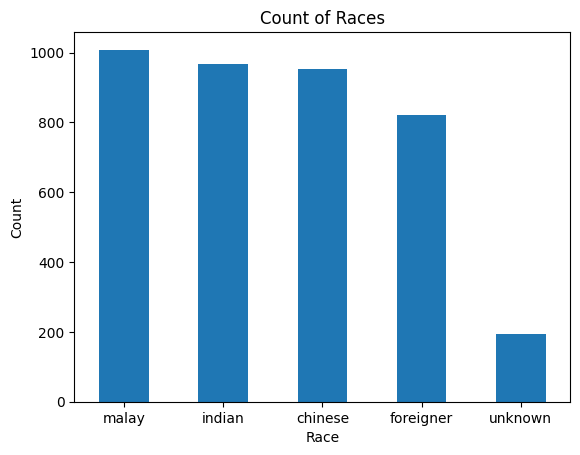

In [35]:
merged_df["Race"].value_counts().plot(kind="bar")
plt.xticks(rotation=360)
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Count of Races')
plt.show()

#### Insight 1: The majority of customers are Malay, with a significant number of Indian and Chinese customers as well.

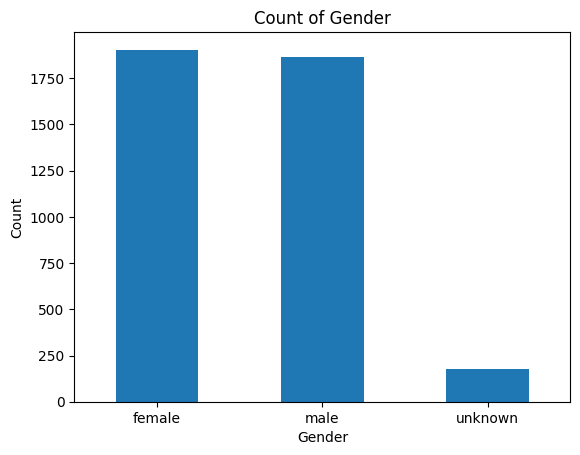

female     1904
male       1867
unknown     175
Name: Gender, dtype: int64

In [36]:
merged_df["Gender"].value_counts().plot(kind="bar")
plt.xticks(rotation=360)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Gender')
plt.show()

merged_df["Gender"].value_counts()

#### Insight 2: The number of female customers are slighly more than the number of male customers.

Firstly, we would like to investigate the _Age_Range_ of the customers. We will perform binning before providing insights. A new column _Age_Bin_ will be created with the grouping of _Age_Range_.

In [37]:
merged_df['Age_Range'].describe()

count    3946.000000
mean       39.468322
std        11.662323
min        18.000000
25%        30.000000
50%        40.000000
75%        49.000000
max        60.000000
Name: Age_Range, dtype: float64

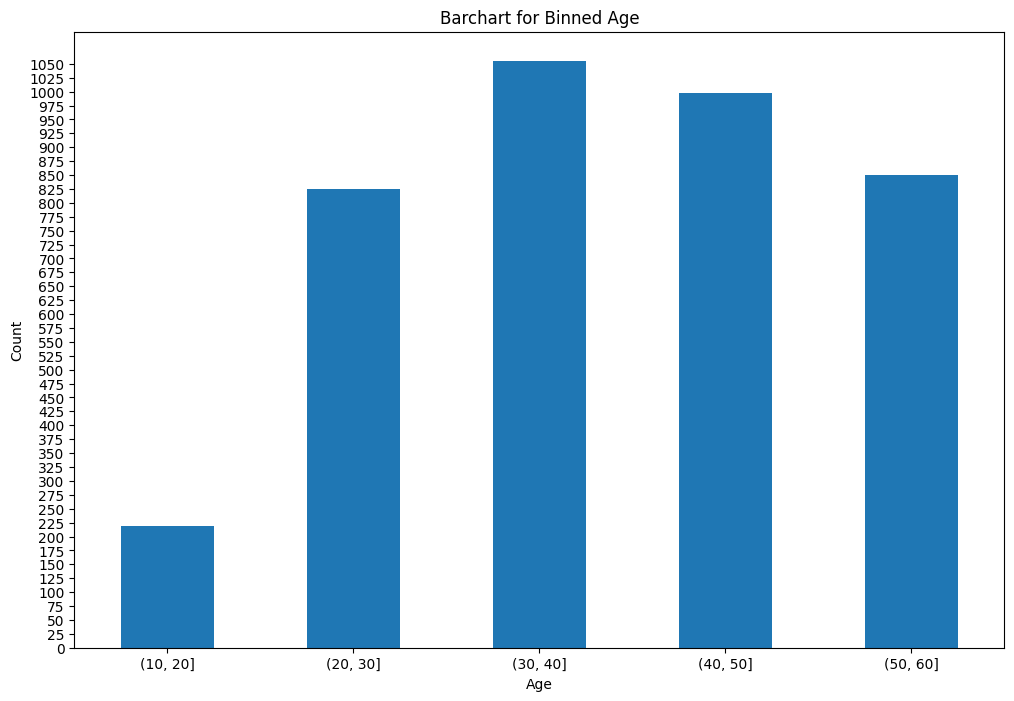

In [38]:
bins = [10,20,30,40,50,60]

df['Age_Bin'] = pd.cut(df['Age_Range'], bins=bins)

# plots barchart
plt.figure(figsize=(12,8))
df['Age_Bin'].value_counts().sort_index().plot(kind='bar')
plt.title('Barchart for Binned Age')
plt.xticks(rotation='horizontal')
plt.yticks(np.arange(0, max(df['Age_Bin'].value_counts())+1, 25))
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

#### Insight 3: The majority of customers are between 30-40 years old.

In [39]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3946 entries, 0 to 3945
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               3946 non-null   object 
 1   Time               3946 non-null   object 
 2   Race               3946 non-null   object 
 3   Gender             3946 non-null   object 
 4   Body_Size          3946 non-null   object 
 5   Age_Range          3946 non-null   float64
 6   With_Kids          3946 non-null   object 
 7   Kids_Category      3946 non-null   object 
 8   Basket_Size        3946 non-null   object 
 9   Basket_colour      3946 non-null   object 
 10  Attire             3946 non-null   object 
 11  Shirt_Colour       3946 non-null   object 
 12  shirt_type         3946 non-null   object 
 13  Pants_Colour       3946 non-null   object 
 14  pants_type         3946 non-null   object 
 15  Wash_Item          3946 non-null   object 
 16  Washer_No          3946 

#### Insight 4: There are not many relationships between the variables.

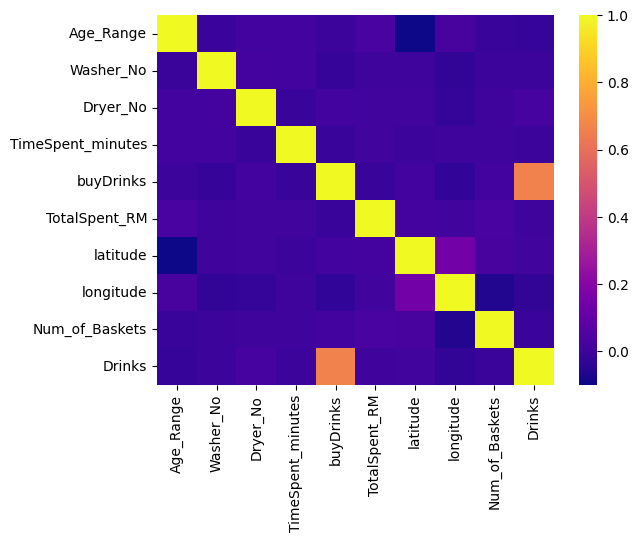

In [40]:
corr = df.corr()
sns.heatmap(corr,  cmap='plasma')
plt.show()

# 1. Clustering Analysis

#### Question 1: Where are the customers located?

To answer this question, we will perform k-means clustering to group the customers based on their geographic locations _(latitude & longitude)_.

In [41]:
# extract the columns lat and lon to be used for clustering
km_df = merged_df[['latitude', 'longitude']]
km_df.head()

,latitude,longitude
0,2.912316,101.657948
1,2.922506,101.643129
2,2.935533,101.737170
3,2.949924,101.637069
4,2.903530,101.661249


We have selected Elbow Method to identify optimal k value.

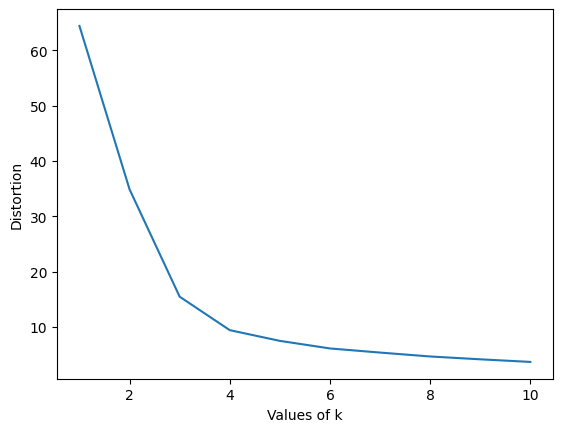

In [42]:
distortion = []

# loop through k values from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(km_df[['latitude', 'longitude']])
    distortion.append(kmeans.inertia_)

plt.plot(range(1, 11), distortion)
plt.xlabel('Values of k')
plt.ylabel('Distortion')
plt.show()

Based on the image above, we have identified 4 as the elbow point, where the distortion starts to decrease at a slower rate.

Therefore, we will perform the k-means clustering with k-value = 4.

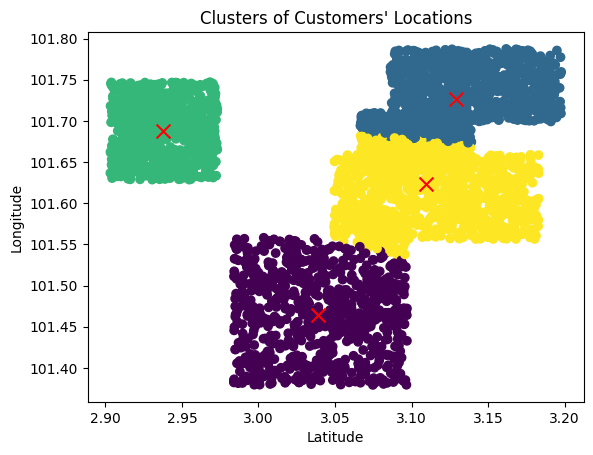

In [43]:
# perform clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(km_df)
km_df['cluster'] = kmeans.labels_

# extract cluster centers
cluster_centers = kmeans.cluster_centers_

plt.scatter(km_df['latitude'], km_df['longitude'], c=km_df['cluster'])
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', color='r', s=100)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Clusters of Customers\' Locations')
plt.show()

Image above shows the clustering for customers' location. The locations have been grouped into 4 clusters, and each clusters are having a 'X' symbol at the center to represent the center points.

Next, we will take the center point to retrieve the exact locations.

In [44]:
geolocator = Nominatim(user_agent="geoapiExercises")

for i in range(len(cluster_centers)):
    cluster_center = [cluster_centers[i][0], cluster_centers[i][1]]
    location = geolocator.reverse(cluster_center, exactly_one=True)
    print(location.raw['address']['city'] + ': ' +str(cluster_centers[i][0]) + ', ' + str(cluster_centers[i][1]))

Majlis Perbandaran Klang: 3.039035835222222, 101.46451752015504
Kuala Lumpur: 3.1291689099028375, 101.7264270600172
Putrajaya: 2.9378713243802816, 101.68811912202305
Petaling Jaya: 3.1097388261188925, 101.62335812385993


#### Answer 1: The customers are majorly located at Kuala Lumpur, Putrajaya, Petaling Jaya and Majlis Perbandaran Klang.

# 2. Association Rule Mining

#### Question 2: Are there any frequent patterns that occur between the various attributes of the customers and the laundry machine usage?


Create a separarte dataframe with only those variables

In [45]:
arm_df = df.copy()
arm_df = arm_df[['Race', 'With_Kids', 'Kids_Category','Basket_Size','Washer_No','Dryer_No','TimeSpent_minutes','buyDrinks','TotalSpent_RM','Num_of_Baskets']]
arm_df

,Race,With_Kids,Kids_Category,Basket_Size,Washer_No,Dryer_No,TimeSpent_minutes,buyDrinks,TotalSpent_RM,Num_of_Baskets
0,malay,yes,young,big,3,10,20.0,2.0,9.0,1.0
1,unknown,no,no_kids,big,6,9,19.0,4.0,21.0,3.0
2,malay,no,no_kids,big,4,10,18.0,2.0,13.0,1.0
3,indian,no,no_kids,unknown,5,9,13.0,2.0,16.0,1.0
4,indian,no,no_kids,big,3,9,15.0,1.0,13.0,3.0
...,...,...,...,...,...,...,...,...,...,...
3941,malay,yes,no_kids,big,5,8,12.0,2.0,15.0,2.0
3942,chinese,no,baby,big,5,7,40.0,2.0,11.0,3.0
3943,chinese,yes,baby,small,3,7,52.0,0.0,13.0,3.0
3944,foreigner,yes,baby,big,6,8,52.0,4.0,20.0,1.0


In [46]:
arm_df.isna().sum()

Race                 0
With_Kids            0
Kids_Category        0
Basket_Size          0
Washer_No            0
Dryer_No             0
TimeSpent_minutes    0
buyDrinks            0
TotalSpent_RM        0
Num_of_Baskets       0
dtype: int64

Convert the dataset into a list of lists, with each sublist containing the values of each variable

In [47]:
arm = []

for index, row in arm_df.iterrows():
    transaction = []
    for col in list(arm_df.columns):
        if pd.notna(row[col]):
            transaction.append(f"{col}:{row[col]}")
    arm.append(transaction)

Use Apriori algorithm to find association rules

In [48]:
association_rules = apriori(arm, min_support=0.009, min_confidence=0.2, min_lift=2, min_length=2)
association_results = list(association_rules)
association_results

[RelationRecord(items=frozenset({'Kids_Category:no_kids', 'Basket_Size:unknown', 'With_Kids:no'}), support=0.019513431322858592, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Basket_Size:unknown', 'With_Kids:no'}), items_add=frozenset({'Kids_Category:no_kids'}), confidence=0.6695652173913044, lift=2.0689932246093083)]),
 RelationRecord(items=frozenset({'Kids_Category:no_kids', 'Race:unknown', 'With_Kids:no'}), support=0.01799290420679169, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Race:unknown', 'With_Kids:no'}), items_add=frozenset({'Kids_Category:no_kids'}), confidence=0.6574074074074074, lift=2.0314249253168595)]),
 RelationRecord(items=frozenset({'Kids_Category:no_kids', 'Basket_Size:big', 'Race:unknown', 'With_Kids:no'}), support=0.013938165230613279, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Basket_Size:big', 'Race:unknown'}), items_add=frozenset({'Kids_Category:no_kids', 'With_Kids:no'}), confidence=0.43999999999999995, lift=2.021

Display the output in a dataframe

In [49]:
pd.options.display.float_format = '{:,.2f}'.format
final_df = pd.DataFrame(columns = ['Left Hand Side', 'Right Hand Side', 'Support(%)', 'Confidence(%)', 'Lift'])

cnt = 0

for item in association_results[: ]:
    cnt += 1
    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    print("(Rule " + str(cnt) + ") " + items[0] + " -> " + items[1])
    left = items[0]
    right = items[1]

    #second index of the inner list
    print("Support: " + str(round(item[1],3)))
    support = str(round(item[1],3)*100)

    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(round(item[2][0][2], 4)))
    confidence = str(round(item[2][0][2], 4)*100)

    print("Lift: " + str(round(item[2][0][3], 4)))
    lift = str(round(item[2][0][3], 4))
    print("=====================================")

    new_row = {'Left Hand Side': left, 'Right Hand Side': right, 'Support(%)': support, 'Confidence(%)': confidence, 'Lift': lift}
    final_df = final_df.append(new_row, ignore_index = True)

final_df['Rules'] = final_df['Left Hand Side'] + ' -> ' + final_df['Right Hand Side']

final_df

(Rule 1) Kids_Category:no_kids -> Basket_Size:unknown
Support: 0.02
Confidence: 0.6696
Lift: 2.069
(Rule 2) Kids_Category:no_kids -> Race:unknown
Support: 0.018
Confidence: 0.6574
Lift: 2.0314
(Rule 3) Kids_Category:no_kids -> Basket_Size:big
Support: 0.014
Confidence: 0.44
Lift: 2.0212
(Rule 4) With_Kids:no -> Basket_Size:big
Support: 0.017
Confidence: 0.2287
Lift: 2.0461
(Rule 5) With_Kids:no -> Basket_Size:big
Support: 0.013
Confidence: 0.2564
Lift: 2.0276
(Rule 6) With_Kids:no -> Basket_Size:big
Support: 0.016
Confidence: 0.2857
Lift: 2.1153
(Rule 7) With_Kids:no -> Basket_Size:big
Support: 0.014
Confidence: 0.2489
Lift: 2.2268
(Rule 8) Race:chinese -> With_Kids:no
Support: 0.01
Confidence: 0.65
Lift: 2.1608


,Left Hand Side,Right Hand Side,Support(%),Confidence(%),Lift,Rules
0,Kids_Category:no_kids,Basket_Size:unknown,2.0,66.96,2.069,Kids_Category:no_kids -> Basket_Size:unknown
1,Kids_Category:no_kids,Race:unknown,1.7999999999999998,65.74,2.0314,Kids_Category:no_kids -> Race:unknown
2,Kids_Category:no_kids,Basket_Size:big,1.4000000000000001,44.0,2.0212,Kids_Category:no_kids -> Basket_Size:big
3,With_Kids:no,Basket_Size:big,1.7000000000000002,22.869999999999997,2.0461,With_Kids:no -> Basket_Size:big
4,With_Kids:no,Basket_Size:big,1.3,25.64,2.0276,With_Kids:no -> Basket_Size:big
5,With_Kids:no,Basket_Size:big,1.6,28.57,2.1153,With_Kids:no -> Basket_Size:big
6,With_Kids:no,Basket_Size:big,1.4000000000000001,24.89,2.2268,With_Kids:no -> Basket_Size:big
7,Race:chinese,With_Kids:no,1.0,65.0,2.1608,Race:chinese -> With_Kids:no


#### Answer 2: From the output, it can be concluded that customers who use big baskets tend to only use 1 basket, are not likely to purchase drinks and usually use the washer no.3. 

# 3. FS & SMOTE & Classification

#### Question 3: Will a customer purchase drinks in the laundry shop?

Logistic regression is a type of regression model used for predicting a binary outcome (1 / 0, Yes / No, True / False) given a set of independent variables. It is used when the outcome variable is categorical in nature. 

Logistic Regression is chosen to answer this question since the target variable is whether the customers will buy drinks or not, yes=1, no=0.

Firstly, we will drop some unnecessary columns such as _Date_, _Time_, _latitute_ and _longitude_ since there columns will not provide contribution to the prediction.

Next, we will perform one-hot encoding to convert categorical data into numerical form.

In [50]:
clf_df = merged_df.copy()

# drop unnecessary columns
clf_df.drop(['Date', 'Time', 'latitude', 'longitude'], axis=1, inplace=True)

# one-hot encoding
col_list = [col for col in clf_df.columns.tolist() if clf_df[col].dtype.name == 'object']
df_ob = clf_df[col_list]
clf_df = clf_df.drop(col_list, 1)
df_ob = pd.get_dummies(df_ob)
clf_df = pd.concat([clf_df, df_ob], axis=1)

clf_df.head()

,Age_Range,Washer_No,Dryer_No,TimeSpent_minutes,buyDrinks,TotalSpent_RM,Num_of_Baskets,Drinks,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,humidity,precip,precipprob,precipcover,windgust,windspeed,winddir,cloudcover,visibility,Race_chinese,Race_foreigner,Race_indian,Race_malay,Race_unknown,Gender_female,Gender_male,Gender_unknown,Body_Size_fat,Body_Size_moderate,Body_Size_thin,Body_Size_unknown,With_Kids_no,With_Kids_unknown,With_Kids_yes,Kids_Category_baby,Kids_Category_no_kids,Kids_Category_toddler,Kids_Category_unknown,Kids_Category_young,Basket_Size_big,Basket_Size_small,Basket_Size_unknown,Basket_colour_black,Basket_colour_blue,Basket_colour_brown,Basket_colour_green,Basket_colour_grey,Basket_colour_orange,Basket_colour_pink,Basket_colour_purple,Basket_colour_red,Basket_colour_unknown,Basket_colour_white,Basket_colour_yellow,Attire_casual,Attire_formal,Attire_traditional,Attire_unknown,Shirt_Colour_black,Shirt_Colour_blue,Shirt_Colour_brown,Shirt_Colour_green,Shirt_Colour_grey,Shirt_Colour_orange,Shirt_Colour_pink,Shirt_Colour_purple,Shirt_Colour_red,Shirt_Colour_unknown,Shirt_Colour_white,Shirt_Colour_yellow,shirt_type_long sleeve,shirt_type_short_sleeve,shirt_type_unknown,Pants_Colour_black,Pants_Colour_blue,Pants_Colour_blue_jeans,Pants_Colour_brown,Pants_Colour_green,Pants_Colour_grey,Pants_Colour_orange,Pants_Colour_pink,Pants_Colour_purple,Pants_Colour_red,Pants_Colour_unknown,Pants_Colour_white,Pants_Colour_yellow,pants_type_long,pants_type_short,pants_type_unknown,Wash_Item_blankets,Wash_Item_clothes,Wash_Item_unknown,Spectacles_no,Spectacles_unknown,Spectacles_yes,preciptype_None,preciptype_rain,conditions_Overcast,conditions_Partially cloudy,"conditions_Rain, Overcast","conditions_Rain, Partially cloudy"
0,28.00,3,10,20.00,2.00,9.00,1.00,1,31.40,26.60,28.80,38.90,26.60,33.50,80.00,0.00,0,0.00,0.00,13.40,153.30,96.50,1.70,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0
1,32.00,6,9,19.00,4.00,21.00,3.00,1,31.40,26.60,28.80,38.90,26.60,33.50,80.00,0.00,0,0.00,0.00,13.40,153.30,96.50,1.70,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,1,0,0,0
2,30.00,4,10,18.00,2.00,13.00,1.00,1,31.40,26.60,28.80,38.90,26.60,33.50,80.00,0.00,0,0.00,0.00,13.40,153.30,96.50,1.70,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,1,0,0,0
3,51.00,5,9,13.00,2.00,16.00,1.00,1,31.40,26.60,28.80,38.90,26.60,33.50,80.00,0.00,0,0.00,0.00,13.40,153.30,96.50,1.70,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0
4,34.00,3,9,15.00,1.00,13.00,3.00,1,31.40,26.60,28.80,38.90,26.60,33.50,80.00,0.00,0,0.00,0.00,13.40,153.30,96.50,1.70,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0


Check for imbalance data in the target variable.

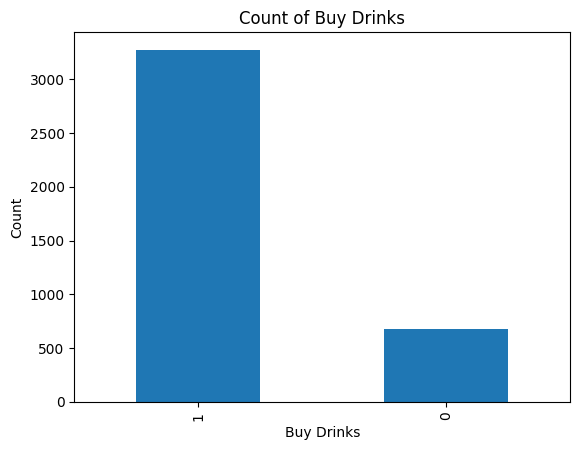

In [51]:
clf_df["Drinks"].value_counts().plot(kind="bar")
plt.xlabel('Buy Drinks')
plt.ylabel('Count')
plt.title("Count of Buy Drinks")
plt.show()

Based on the image shown above, we can see that the class distribution is highly skewed towards 1 (customers who bought drinks). Therefore, the data is imbalanced. We decide to oversample the minority class (0) by using SMOTE. 

Before that, we will perform feature selection by using Boruta. Boruta is used to identify the most important features from the dataset and we will only use Top 10 features for the prediction.

## Boruta Feature Selection

In [52]:
# boruta feature selection
clf_X = clf_df.drop(['Drinks', 'buyDrinks'], axis=1)
clf_y = clf_df['Drinks']
clf_colnames = clf_X.columns

# prepare boruta classifier
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced_subsample', max_depth=5)
feat_selector = BorutaPy(rf, n_estimators='auto', random_state=1)

# fir boruta classifier to data
feat_selector.fit(clf_X.values, clf_y.values)

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                          max_depth=5, n_estimators=48,
                                          n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x28CB2ABB340),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x28CB2ABB340)

In [53]:
# get the ranking of the features returned by Boruta
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

boruta_score = ranking(list(map(float, feat_selector.ranking_)), clf_colnames, order=-1)
boruta_score = pd.DataFrame(list(boruta_score.items()), columns=['Features', 'Score'])
boruta_score = boruta_score.sort_values("Score", ascending = False)

# extract top 10 features
boruta_top_10 = boruta_score.Features[:10]

In [54]:
# display top and bottom 10 features
print('---------Top 10----------')
display(boruta_score.head(10))

print('---------Bottom 10----------')
boruta_score.tail(10)

---------Top 10----------


,Features,Score
12,humidity,1.00
18,winddir,1.00
3,TimeSpent_minutes,0.99
0,Age_Range,0.98
19,cloudcover,0.97
20,visibility,0.96
17,windspeed,0.95
8,temp,0.94
10,feelslikemin,0.94
9,feelslikemax,0.92


---------Bottom 10----------


,Features,Score
77,Pants_Colour_blue_jeans,0.09
95,Spectacles_unknown,0.09
48,Basket_colour_grey,0.07
87,Pants_Colour_yellow,0.06
93,Wash_Item_unknown,0.05
65,Shirt_Colour_orange,0.04
79,Pants_Colour_green,0.03
99,conditions_Overcast,0.02
39,Kids_Category_unknown,0.01
90,pants_type_unknown,0.00


We have done with the feature selection, tables above show Top 10 and Bottom 10 features along with the importance scores. In the following section, we will only use Top 10 features.

Now, we have to prepare the dataset for training and testing. 'Drinks' is our target variable since we want to predict whether a customer will buy drinks or not.

In [55]:
# split the dataset into X (feature variables) and y (target variable)
clf_X = clf_df[boruta_top_10]
clf_y = clf_df['Drinks']

# split the data into training and test sets (80% for training and 20% for testing)
clf_X_train, clf_X_test, clf_y_train, clf_y_test = train_test_split(clf_X, clf_y, test_size=0.2, random_state=42)

# apply SMOTE to the training set
sm = SMOTE()
X_train_smote, y_train_smote = sm.fit_resample(clf_X_train, clf_y_train)

print(clf_X_train.shape)
print(clf_y_train.shape)
print(clf_X_test.shape)
print(clf_y_test.shape)

(3156, 10)
(3156,)
(790, 10)
(790,)


Create a _evaluate_model()_ function that will calculate accuracy, AUC score, precision0-recall score and plot charts.

In [56]:
def evaluate_model(clf, X_train, y_train, colour, label):
    print("Accuracy: {:.3f}".format(accuracy_score(clf_y_test, clf_y_pred)))
    print("Accuracy on training set: {:.3f}".format(logreg_clf.score(X_train, y_train)))
    print("Accuracy on test set: {:.3f}".format(logreg_clf.score(clf_X_test, clf_y_test)))

    # confusion matrix
    cm = confusion_matrix(clf_y_test, clf_y_pred)
    print('**********************')
    print('Majority TN =', cm[0][0])
    print('Majority FP =', cm[0][1])
    print('Majority FN =', cm[1][0])
    print('Majority TP =', cm[1][1])
    print('**********************')

    # calculate AUC
    prob = clf.predict_proba(clf_X_test)
    prob = prob[:, 1]
    auc = roc_auc_score(clf_y_test, prob)
    print('AUC: %.2f' % auc)

    fpr, tpr, thresholds = roc_curve(clf_y_test, prob) # roc curve
    prec, rec, threshold = precision_recall_curve(clf_y_test, prob) # precision-recall curve

    print("Precision-Recall: {:.2f}".format(metrics.auc(rec, prec)))

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot()
    plt.title('Confusion Matrix')
    plt.show()

    # plot ROC Curve 
    plt.plot(fpr, tpr, color=colour, label=label) 
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

    # plot Precision-Recall Curve
    plt.plot(prec, rec, color=colour, label=label) 
    plt.plot([1, 0], [0.1, 0.1], color='green', linestyle='--')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

    return fpr, tpr, prec, rec

Now, we will start training the model. We are going to use three different classification models which are **Logistic Regression**, **k-Nearest Neighbors** and **Naive Bayes**. In this stage, we will train the models with dataset before performing SMOTE.

For each model, **Accuracy**, **Confusion Matrix**, **Area Under the Curve (AUC)** and **Precision-Recall** will be used to evaluate the performance. At the same time, **Receiver Operating Characteristics (ROC) Curve** and **Precision-Recall Curve** will be plotted.

After training all the models, a model comparison will be presented.

## Logistic Regression - without SMOTE

--------------WITHOUT SMOTE--------------
Accuracy: 0.804
Accuracy on training set: 0.836
Accuracy on test set: 0.804
**********************
Majority TN = 0
Majority FP = 155
Majority FN = 0
Majority TP = 635
**********************
AUC: 0.56
Precision-Recall: 0.83


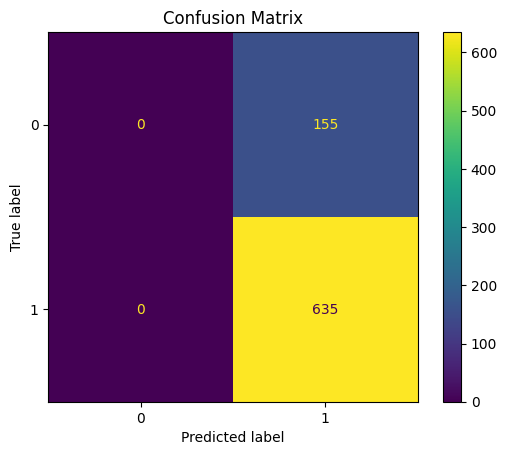

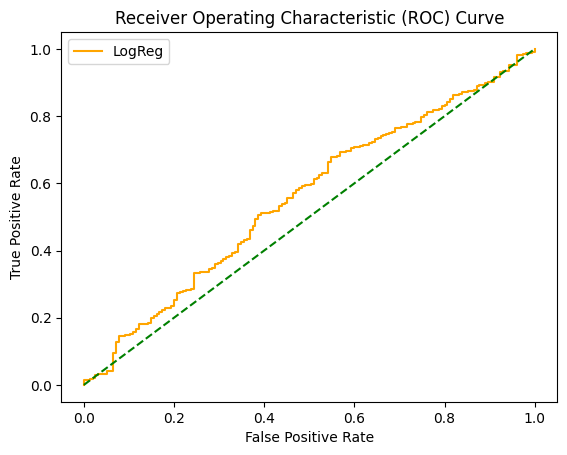

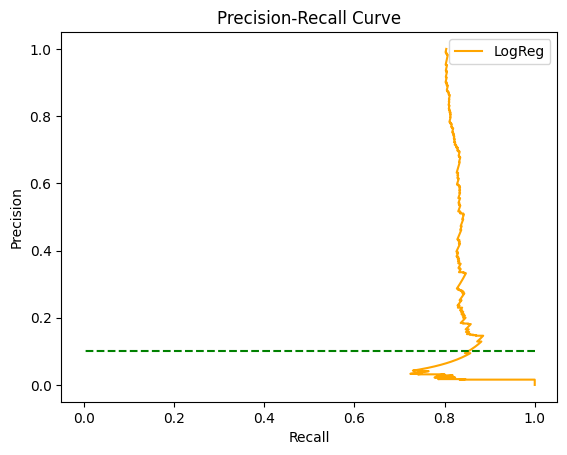

In [57]:
# train the model
logreg_clf = LogisticRegression()
logreg_clf.fit(clf_X_train, clf_y_train)

clf_y_pred = logreg_clf.predict(clf_X_test)

# model accuracy
print('--------------WITHOUT SMOTE--------------')
logreg_fpr, logreg_tpr, logreg_prec, logreg_rec = evaluate_model(logreg_clf, clf_X_train, clf_y_train, 'orange', 'LogReg')

## kNN - without SMOTE

--------------WITHOUT SMOTE--------------
Accuracy: 0.804
Accuracy on training set: 0.836
Accuracy on test set: 0.804
**********************
Majority TN = 0
Majority FP = 155
Majority FN = 0
Majority TP = 635
**********************
AUC: 0.54
Precision-Recall: 0.84


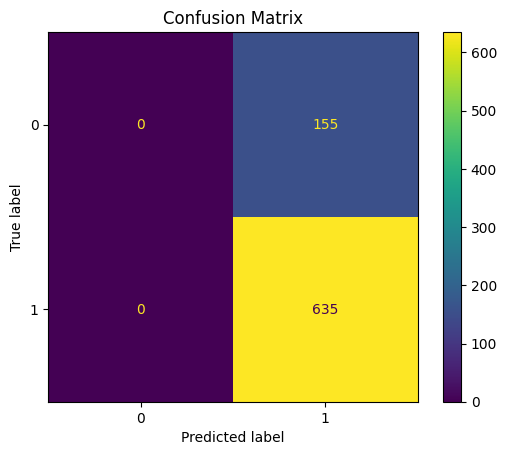

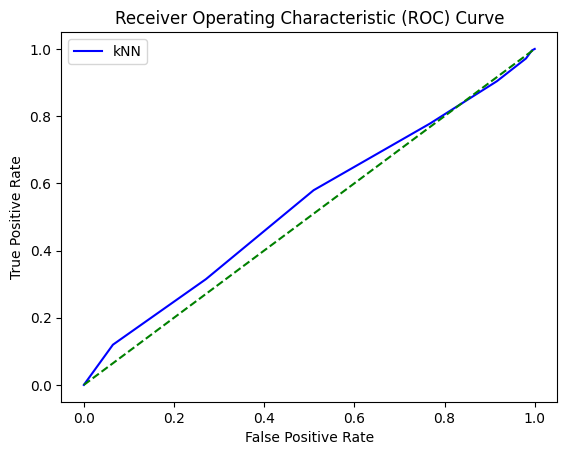

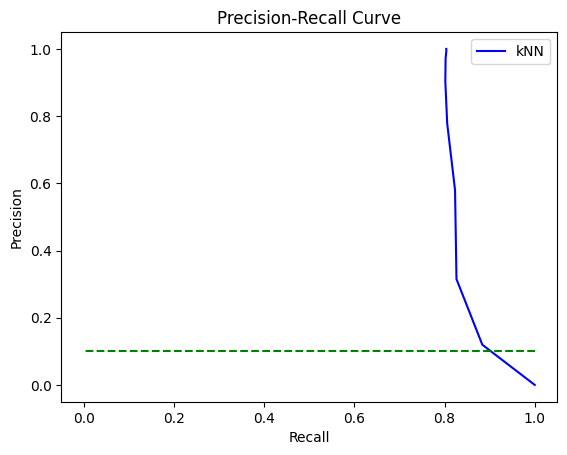

In [58]:
# train the model
knn_clf = KNeighborsClassifier(n_neighbors=15)
knn_clf.fit(clf_X_train, clf_y_train)

clf_y_pred = knn_clf.predict(clf_X_test)

# model accuracy
print('--------------WITHOUT SMOTE--------------')
knn_fpr, knn_tpr, knn_prec, knn_rec = evaluate_model(knn_clf, clf_X_train, clf_y_train, 'blue', 'kNN')

## Naive Bayes - without SMOTE

--------------WITHOUT SMOTE--------------
Accuracy: 0.787
Accuracy on training set: 0.836
Accuracy on test set: 0.804
**********************
Majority TN = 13
Majority FP = 142
Majority FN = 26
Majority TP = 609
**********************
AUC: 0.55
Precision-Recall: 0.82


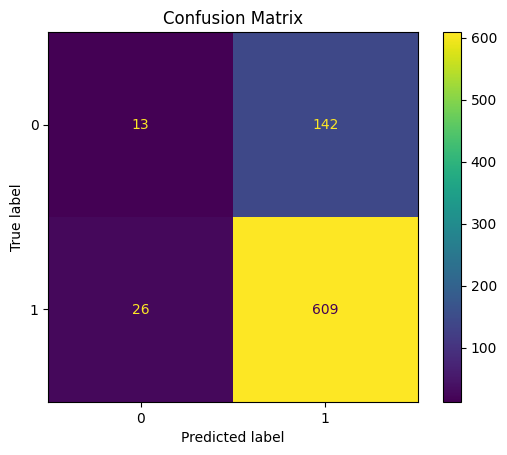

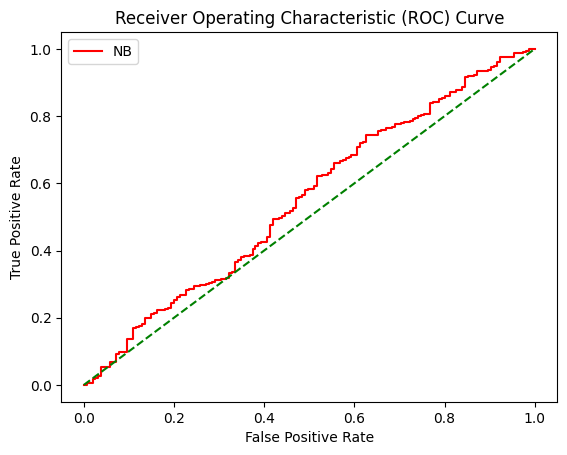

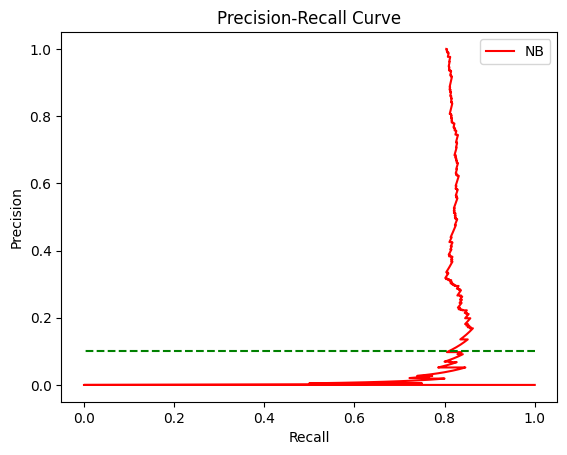

In [59]:
# train the model
nb_clf = GaussianNB()
nb_clf.fit(clf_X_train, clf_y_train)

clf_y_pred = nb_clf.predict(clf_X_test)

# model accuracy
print('--------------WITHOUT SMOTE--------------')
nb_fpr, nb_tpr, nb_prec, nb_rec = evaluate_model(nb_clf, clf_X_train, clf_y_train, 'red', 'NB')

## Model Comparison - without SMOTE

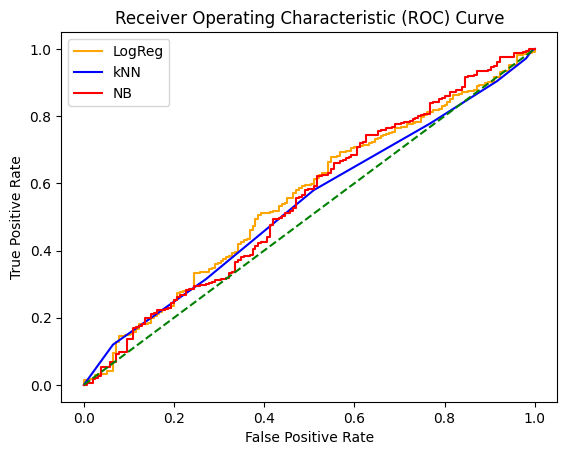

In [60]:
plt.plot(logreg_fpr, logreg_tpr, color='orange', label='LogReg') 
plt.plot(knn_fpr, knn_tpr, color='blue', label='kNN')  
plt.plot(nb_fpr, nb_tpr, color='red', label='NB')  
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

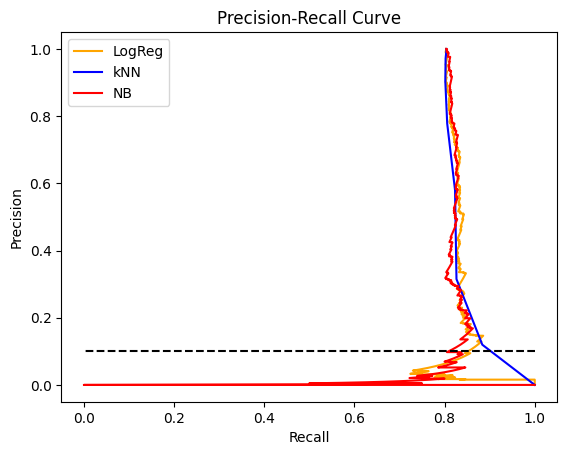

In [61]:
plt.plot(logreg_prec, logreg_rec, color='orange', label='LogReg') 
plt.plot(knn_prec, knn_rec, color='blue', label='kNN') 
plt.plot(nb_prec, nb_rec, color='red', label='NB') 
plt.plot([1, 0], [0.1, 0.1], color='black', linestyle='--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

From the results shown above, all three models are having **similar accuracy scores** and **similar AUC scores**. The accuracy of all three models is relatively similar, which is around 0.787 to 0.804, while the AUC scores are around 0.54 to 0.56.

The **logistic regression model is having the highest accuracy at around 0.804, highest AUC score at 0.56 and highest precision-recall at 0.83**. This suggests that the logistic regression model may be the best performing model in terms of classifying whether a customer will purchase drinks in the laundry shop. 

Now, we will train the models with dataset after oversampling by using SMOTE. We will be using the same models and also the same metrics to do the evaluation.

## Logistic Regression - with SMOTE

--------------WITH SMOTE--------------
Accuracy: 0.549
Accuracy on training set: 0.521
Accuracy on test set: 0.549
**********************
Majority TN = 89
Majority FP = 66
Majority FN = 290
Majority TP = 345
**********************
AUC: 0.56
Precision-Recall: 0.84


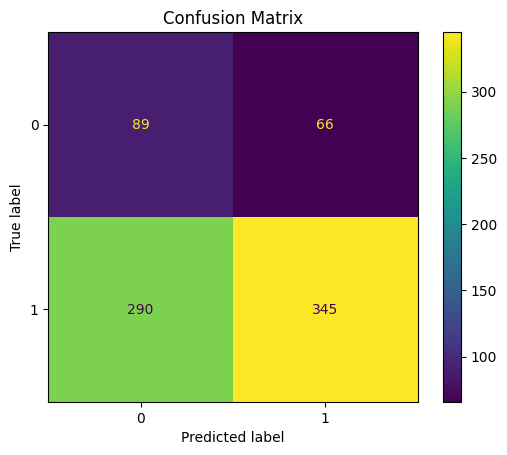

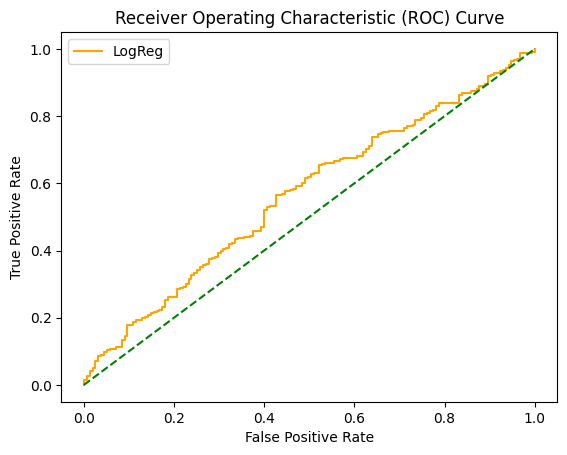

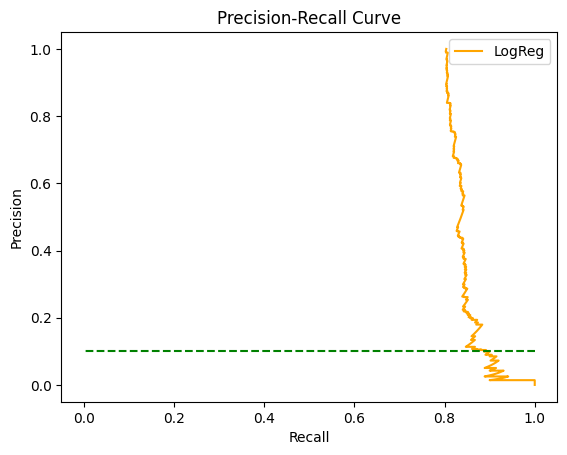

In [62]:
# train the model
logreg_clf = LogisticRegression()
logreg_clf.fit(X_train_smote, y_train_smote)

clf_y_pred = logreg_clf.predict(clf_X_test)

# model accuracy
print('--------------WITH SMOTE--------------')
logreg_sm_fpr, logreg_sm_tpr, logreg_sm_prec, logreg_sm_rec = evaluate_model(logreg_clf, X_train_smote, y_train_smote, 'orange', 'LogReg')

## kNN - with SMOTE

--------------WITH SMOTE--------------
Accuracy: 0.567
Accuracy on training set: 0.521
Accuracy on test set: 0.549
**********************
Majority TN = 76
Majority FP = 79
Majority FN = 263
Majority TP = 372
**********************
AUC: 0.53
Precision-Recall: 0.83


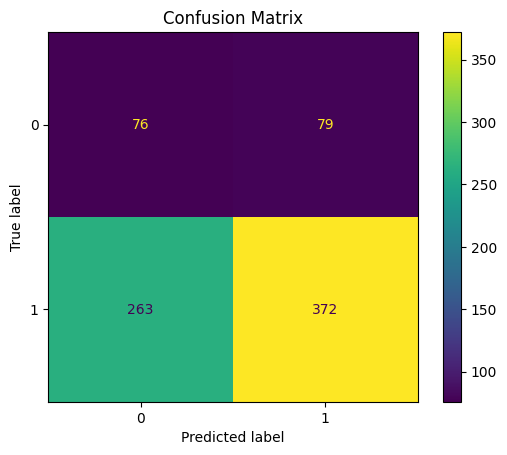

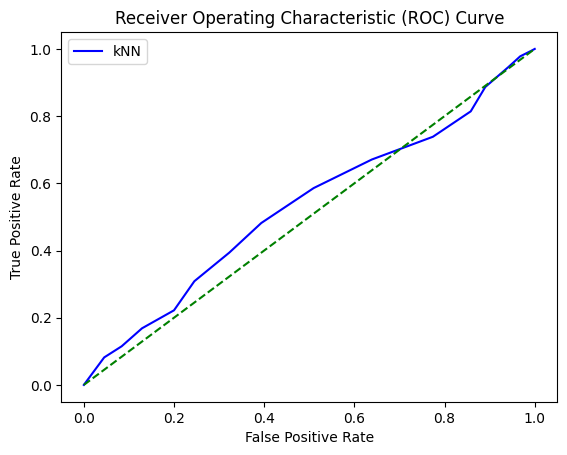

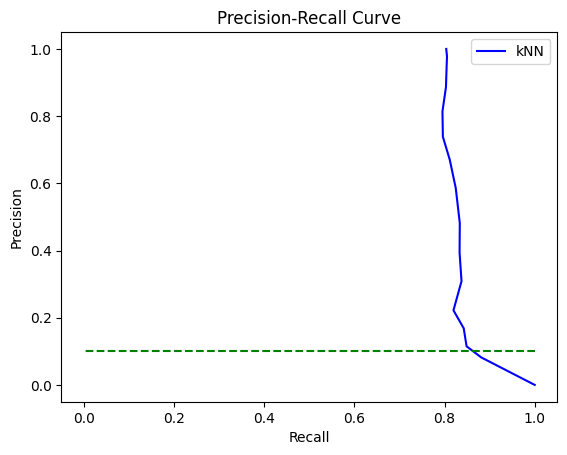

In [63]:
# train the model
knn_clf = KNeighborsClassifier(n_neighbors=15)
knn_clf.fit(X_train_smote, y_train_smote)

clf_y_pred = knn_clf.predict(clf_X_test)

# model accuracy
print('--------------WITH SMOTE--------------')
knn_sm_fpr, knn_sm_tpr, knn_sm_prec, knn_sm_rec = evaluate_model(knn_clf, X_train_smote, y_train_smote, 'blue', 'kNN')

## Naive Bayes - with SMOTE

--------------WITH SMOTE--------------
Accuracy: 0.480
Accuracy on training set: 0.521
Accuracy on test set: 0.549
**********************
Majority TN = 79
Majority FP = 76
Majority FN = 335
Majority TP = 300
**********************
AUC: 0.51
Precision-Recall: 0.80


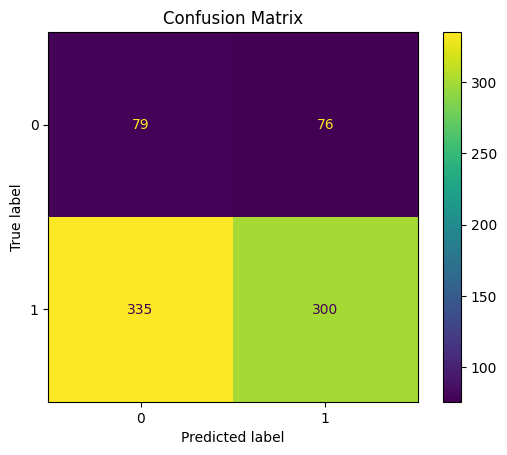

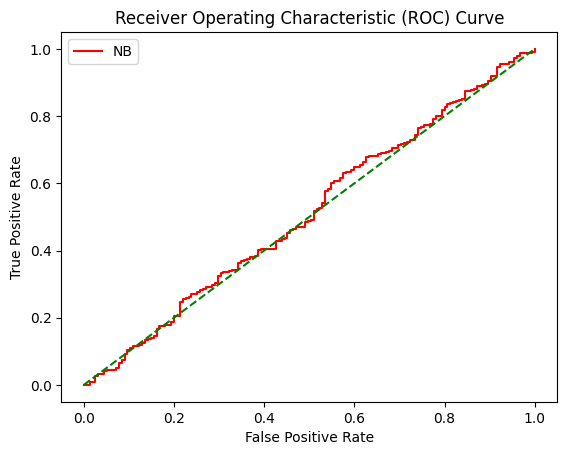

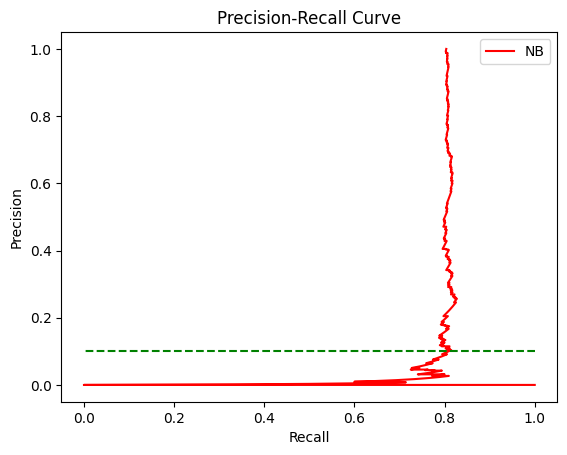

In [64]:
# train the model
nb_clf = GaussianNB()
nb_clf.fit(X_train_smote, y_train_smote)

clf_y_pred = nb_clf.predict(clf_X_test)

# model accuracy
print('--------------WITH SMOTE--------------')
nb_sm_fpr, nb_sm_tpr, nb_sm_prec, nb_sm_rec = evaluate_model(nb_clf, X_train_smote, y_train_smote, 'red', 'NB')

## Model Comparison - with SMOTE

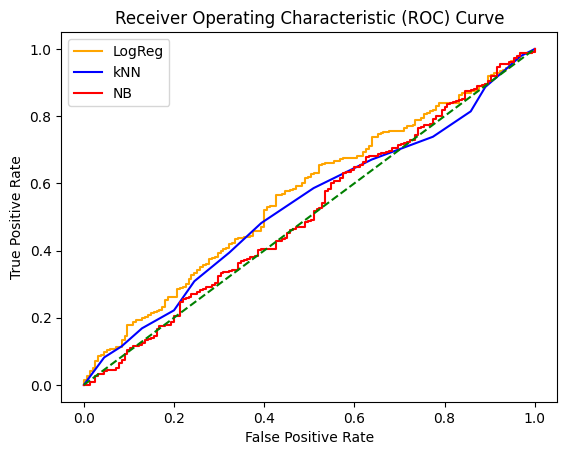

In [65]:
plt.plot(logreg_sm_fpr, logreg_sm_tpr, color='orange', label='LogReg') 
plt.plot(knn_sm_fpr, knn_sm_tpr, color='blue', label='kNN')  
plt.plot(nb_sm_fpr, nb_sm_tpr, color='red', label='NB')  
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

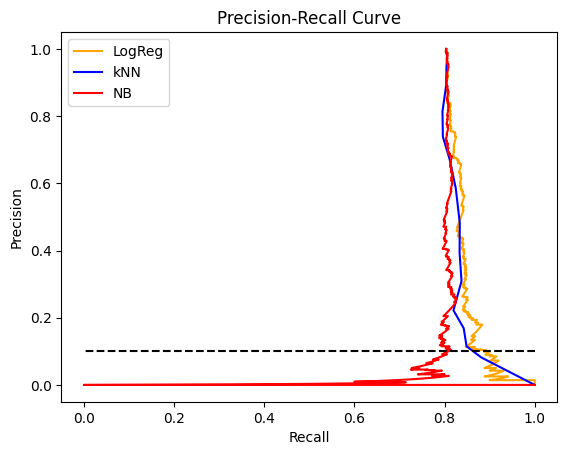

In [66]:
plt.plot(logreg_sm_prec, logreg_sm_rec, color='orange', label='LogReg') 
plt.plot(knn_sm_prec, knn_sm_rec, color='blue', label='kNN') 
plt.plot(nb_sm_prec, nb_sm_rec, color='red', label='NB') 
plt.plot([1, 0], [0.1, 0.1], color='black', linestyle='--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

Based on the results shown above, it seems that the **Logistic Regression performed the best with an AUC of 0.56 and a Precision-Recall of 0.83** when using SMOTE to balance the target variable. The KNN model had the second best performance with an AUC of 0.51 and a Precision-Recall of 0.83, while the Naive Bayes model had the worst performance with an AUC of 0.54 and a Precision-Recall of 0.81.

#### Answer 3: In this case, Logistic Regression is perfoming better than k-Nearest Neighbors and Naive Bayes. However, we would conclude that all models have relatively low accuracy and AUC scores, indicating that they may not be performing very well on this dataset. Therefore, it is hard to predict whether if a customer will buy a drinks by relying on these models.

# 4. FS & Regression

#### Question 4: What is the relationship between the weather conditions and the number of customers at the laundry shop? 

All the columns are dropped except for weather related data.

In [67]:
# drop columns that are not related to weather
weather_cus = merged_df.drop(['Time', 'Race', 'Gender', 'Body_Size', 'Age_Range', 'With_Kids',
       'Kids_Category', 'Basket_Size', 'Basket_colour', 'Attire',
       'Shirt_Colour', 'shirt_type', 'Pants_Colour', 'pants_type', 'Wash_Item',
       'Washer_No', 'Dryer_No', 'Spectacles', 'TimeSpent_minutes', 'buyDrinks',
       'latitude', 'longitude', 'Num_of_Baskets'], axis=1)

# group by the weather and calcute count of customer on each day
weather_cus = weather_cus.groupby(['Date', 'tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin',
       'feelslike', 'humidity', 'precip', 'precipprob', 'precipcover',
       'preciptype', 'windgust', 'windspeed', 'winddir', 'cloudcover',
       'visibility', 'conditions']).size().reset_index(name='count')

weather_cus.drop(['Date'], axis=1, inplace=True)
weather_cus.head(5)

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,humidity,precip,precipprob,precipcover,preciptype,windgust,windspeed,winddir,cloudcover,visibility,conditions,count
0,31.40,26.60,28.80,38.90,26.60,33.50,80.00,0.00,0,0.00,None,0.00,13.40,153.30,96.50,1.70,Overcast,7
1,30.00,25.00,27.70,37.20,25.00,31.30,83.60,0.00,0,0.00,None,0.00,10.00,127.50,96.50,1.20,Overcast,58
2,32.40,25.00,28.40,38.00,25.00,31.40,78.20,0.00,0,0.00,None,0.00,13.60,132.60,92.60,1.90,Overcast,25
3,32.90,25.00,28.50,38.40,25.00,31.50,75.30,0.00,0,0.00,None,0.00,11.60,140.90,90.00,4.00,Partially cloudy,20
4,33.40,26.00,29.20,40.30,26.00,33.30,75.00,2.67,100,4.17,rain,0.00,14.50,150.30,90.50,3.50,"Rain, Overcast",29


In [68]:
# one-hot encoding
col_list = [col for col in weather_cus.columns.tolist() if weather_cus[col].dtype.name == 'object']
df_ob = weather_cus[col_list]
weather_cus = weather_cus.drop(col_list, 1)
df_ob = pd.get_dummies(df_ob)
weather_cus = pd.concat([weather_cus, df_ob], axis=1)
weather_cus.head()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,humidity,precip,precipprob,precipcover,windgust,windspeed,winddir,cloudcover,visibility,count,preciptype_None,preciptype_rain,conditions_Overcast,conditions_Partially cloudy,"conditions_Rain, Overcast","conditions_Rain, Partially cloudy"
0,31.40,26.60,28.80,38.90,26.60,33.50,80.00,0.00,0,0.00,0.00,13.40,153.30,96.50,1.70,7,1,0,1,0,0,0
1,30.00,25.00,27.70,37.20,25.00,31.30,83.60,0.00,0,0.00,0.00,10.00,127.50,96.50,1.20,58,1,0,1,0,0,0
2,32.40,25.00,28.40,38.00,25.00,31.40,78.20,0.00,0,0.00,0.00,13.60,132.60,92.60,1.90,25,1,0,1,0,0,0
3,32.90,25.00,28.50,38.40,25.00,31.50,75.30,0.00,0,0.00,0.00,11.60,140.90,90.00,4.00,20,1,0,0,1,0,0
4,33.40,26.00,29.20,40.30,26.00,33.30,75.00,2.67,100,4.17,0.00,14.50,150.30,90.50,3.50,29,0,1,0,0,1,0


## RFE Feature Selection & Hyperparameter Tuning

Hyperparameter tuning is done for the feature selection

In [69]:
X = weather_cus.drop(['count'], axis=1)
y = weather_cus['count']
colnames = X.columns

This part of hyperparameter tuning for the feature selection is commented as it takes a long time to run.

In [70]:
# X = weather_cus.drop(['count'], axis=1)
# y = weather_cus['count']
# colnames = X.columns

# rf = RandomForestClassifier()
# rfe = RFECV(rf, cv=5)

# param_grid = {"estimator__n_estimators": [10, 50, 100],
#               "estimator__max_depth": [1, 5, 10],
#               "estimator__min_samples_leaf": [1, 2, 4]}

# grid_search = GridSearchCV(rfe, param_grid, cv=5)
# grid_search.fit(X, y)

# print("Best parameters: {}".format(grid_search.best_params_))
# print("Best score: {:.2f}".format(grid_search.best_score_))

In [71]:
ht_rf = RandomForestClassifier(n_estimators=10, max_depth=1, min_samples_leaf=1)

rf.fit(X, y)
rfe = RFECV(ht_rf, min_features_to_select=1, cv=2)

rfe.fit(X, y)

RFECV(cv=2, estimator=RandomForestClassifier(max_depth=1, n_estimators=10))

In [72]:
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

rfe_score = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)
rfe_score = pd.DataFrame(list(rfe_score.items()), columns=['Features', 'Score'])
rfe_score = rfe_score.sort_values("Score", ascending = False)

rfe_top_5 = rfe_score.Features[:5]

print('---------Top 10----------')
display(rfe_score.head(10))

print('---------Bottom 10----------')
rfe_score.tail(10)

---------Top 10----------


,Features,Score
5,feelslike,1.00
14,visibility,1.00
2,temp,0.95
12,winddir,0.89
19,"conditions_Rain, Overcast",0.84
18,conditions_Partially cloudy,0.79
17,conditions_Overcast,0.74
7,precip,0.68
16,preciptype_rain,0.63
15,preciptype_None,0.58


---------Bottom 10----------


,Features,Score
9,precipcover,0.47
8,precipprob,0.42
3,feelslikemax,0.37
6,humidity,0.32
4,feelslikemin,0.26
11,windspeed,0.21
20,"conditions_Rain, Partially cloudy",0.16
1,tempmin,0.11
10,windgust,0.05
0,tempmax,0.00


In [73]:
reg_X = weather_cus[rfe_top_5]
reg_y = weather_cus['count']

# split the data into training and test sets
reg_X_train, reg_X_test, reg_y_train, reg_y_test = train_test_split(reg_X, reg_y, test_size=0.3, random_state=50)

## Hyperparameter Tuning for Regression Models

Perform hyperparameter tuning for linear regression and Support Vector Regressor using GridSearch

In [74]:
# Create the linear regression model
linreg = LinearRegression()

# Define the hyperparameters and their possible values
parameters = {'fit_intercept':[True,False], 
              'copy_X':[True,False], 
              'n_jobs':[-1, 1, 2],
              'positive':[True,False]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(linreg, parameters, cv=5)
grid_search.fit(reg_X_train, reg_y_train)

# Print the best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'copy_X': True, 'fit_intercept': False, 'n_jobs': -1, 'positive': True}
Best score:  -0.10473653570516331


In [75]:
svr = SVR()

param_grid = {"C": [0.1, 1, 10], 
              "kernel": ["linear", "poly", "rbf"],
              "degree":[1, 2, 3],
              "epsilon": [0.01, 0.1, 1]}
    
svr_grid_search = GridSearchCV(svr, param_grid, cv=5)
svr_grid_search.fit(reg_X_train, reg_y_train)
print("Best parameters: {}".format(svr_grid_search.best_params_))
print("Best score: ", svr_grid_search.best_score_)

Best parameters: {'C': 10, 'degree': 1, 'epsilon': 1, 'kernel': 'linear'}
Best score:  -0.04684490026675416


This score is the negative of the mean squared error (MSE) of the prediction, the smaller the MSE, the closer the predictions are to the true values, so a negative MSE means a better fit.

## Linear Regression

In [76]:
# create the linear regression model
linreg = LinearRegression()

# fit the model to the training data
linreg.fit(reg_X_train, reg_y_train)

# use the model to make predictions on the test data
reg_y_pred = linreg.predict(reg_X_test)

# calculate the mean absolute error and r-squared of the predictions
mae_lin = mean_absolute_error(reg_y_test, reg_y_pred)
r2_lin = r2_score(reg_y_test, reg_y_pred)

# print the results
print("Mean Absolute Error: ", mae_lin)
print("R2 Score: ", r2_lin)

Mean Absolute Error:  9.148644607650953
R2 Score:  0.08247717615122818


In [77]:
# Train the final model on the entire training set
linreg_ht = LinearRegression(**grid_search.best_params_)
linreg_ht.fit(reg_X_train, reg_y_train)

# Evaluate the final model on the test set
reg_y_pred = linreg_ht.predict(reg_X_test)

# calculate the mean absolute error and r-squared of the predictions
mae_lin_ht = mean_absolute_error(reg_y_test, reg_y_pred)
r2_lin_ht = r2_score(reg_y_test, reg_y_pred)

# print the results
print("Mean Absolute Error: ", mae_lin_ht)
print("R2 Score: ", r2_lin_ht)

Mean Absolute Error:  9.348323826996978
R2 Score:  0.013962763382212251


In [78]:
table = {'Metrics': ['Mean Absolute Error','R2 Score'],
        'Before Hyperparameter tuning': [mae_lin, r2_lin],
        'After Hyperparameter tuning': [mae_lin_ht, r2_lin_ht]}

lr_result = pd.DataFrame(table)
lr_result.set_index(lr_result.columns[0], inplace=True)

lr_result

,Before Hyperparameter tuning,After Hyperparameter tuning
Metrics,,
Mean Absolute Error,9.15,9.35
R2 Score,0.08,0.01


## Support Vector Regression (SVR)

In [79]:
# create the SVR model
svr = SVR(kernel='linear', C=1.0, epsilon=0.1)

# fit the model to the training data
svr.fit(reg_X_train, reg_y_train)

# use the model to make predictions on the test data
reg_y_pred = svr.predict(reg_X_test)

# calculate the mean absolute error and r-squared of the predictions
mae_svr = mean_absolute_error(reg_y_test, reg_y_pred)
r2_svr = r2_score(reg_y_test, reg_y_pred)

# print the results
print("Mean Absolute Error: ", mae_svr)
print("R2 Score: ", r2_svr)

Mean Absolute Error:  8.831760060480146
R2 Score:  0.05663982518051136


In [80]:
# create the SVR model
svr_ht = SVR(**svr_grid_search.best_params_)

# fit the model to the training data
svr.fit(reg_X_train, reg_y_train)

# use the model to make predictions on the test data
reg_y_pred = svr.predict(reg_X_test)

# calculate the mean absolute error and r-squared of the predictions
mae_svr_ht = mean_absolute_error(reg_y_test, reg_y_pred)
r2_svr_ht = r2_score(reg_y_test, reg_y_pred)

# print the results
print("Mean Absolute Error: ", mae_svr_ht)
print("R2 Score: ", r2_svr_ht)

Mean Absolute Error:  8.831760060480146
R2 Score:  0.05663982518051136


In [81]:
table = {'Metrics': ['Mean Absolute Error','R2 Score'],
        'Before Hyperparameter tuning': [mae_svr, r2_svr],
        'After Hyperparameter tuning': [mae_svr_ht, r2_svr_ht]}

svr_result = pd.DataFrame(table)
svr_result.set_index(svr_result.columns[0], inplace=True)
svr_result = svr_result.round(decimals=4)

display(svr_result)

,Before Hyperparameter tuning,After Hyperparameter tuning
Metrics,,
Mean Absolute Error,8.83,8.83
R2 Score,0.06,0.06


In [82]:
print("Linear Regression R-squared: {:.3f} MAE: {:.3f}".format(r2_lin, mae_lin))
print("SVR R-squared: {:.3f} MAE: {:.3f}".format(r2_svr, mae_svr))
print("Linear Regression after Hyperparameter tuning R-squared: {:.3f} MAE: {:.3f}".format(r2_lin_ht, mae_lin_ht))
print("SVR after Hyperparameter tuning R-squared: {:.3f} MAE: {:.3f}".format(r2_svr_ht, mae_svr_ht))

Linear Regression R-squared: 0.082 MAE: 9.149
SVR R-squared: 0.057 MAE: 8.832
Linear Regression after Hyperparameter tuning R-squared: 0.014 MAE: 9.348
SVR after Hyperparameter tuning R-squared: 0.057 MAE: 8.832


#### Answer 4: To answer the question, both regression models are poorly performing. Both models are not suitable for predicting the number of customers based on the weather conditions. Therefore, we can conclude that the relationship between weather and the number of customers is weak.